# PySpark SQL & DataFrames

In this chapter, you'll learn about Spark SQL which is a Spark module for structured data processing. It provides a programming abstraction called DataFrames and can also act as a distributed SQL query engine. This chapter shows how Spark SQL allows you to use DataFrames in Python.

## RDD to DataFrame
Similar to RDDs, DataFrames are immutable and distributed data structures in Spark. Even though RDDs are a fundamental data structure in Spark, working with data in DataFrame is easier than RDD most of the time and so understanding of how to convert RDD to DataFrame is necessary.

In this exercise, you'll first make an RDD using the sample_list which contains the list of tuples ('Mona',20), ('Jennifer',34),('John',20), ('Jim',26) with each tuple contains the name of the person and their age. Next, you'll create a DataFrame using the RDD and the schema (which is the list of 'Name' and 'Age') and finally confirm the output as PySpark DataFrame.

In [2]:
# Create a list of tuples
sample_list = [('Mona',20), ('Jennifer',34), ('John',20), ('Jim',26)]

# Create a RDD from the list
rdd = sc.parallelize(sample_list)

# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])

# Check the type of names_df
print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


## Loading CSV into DataFrame
In the previous exercise, you have seen a method of creating DataFrame but generally, loading data from CSV file is the most common method of creating DataFrames. In this exercise, you'll create a PySpark DataFrame from a people.csv file that is already provided to you as a file_path and confirm the created object is a PySpark DataFrame.

In [3]:
# Path to data
file_path = ".../data/datacamp/people"

# Create an DataFrame from file_path
people_df = spark.read.parquet(file_path)

# Check the type of people_df
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


## Inspecting data in PySpark DataFrame
Inspecting data is very crucial before performing analysis such as plotting, modeling, training etc., In this simple exercise, you'll inspect the data in the people_df DataFrame that you have created in the previous exercise using basic DataFrame operators.

In [4]:
# Print the first 10 observations 
people_df.show(10)

# Count the number of rows 
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))

# Count the number of columns and their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(people_df.columns), people_df.columns))

+---------+------------------+------+-----------+
|person_id|              name|   sex|dateofbirth|
+---------+------------------+------+-----------+
|    30100|    Terrence Mahon|  male| 1967-11-24|
|    30101|   Ricardo Watkins|  male| 1976-09-23|
|    30102|       Erin Ullman|female| 1960-09-10|
|    30103|       Henry Crain|  male| 2004-11-25|
|    30104|     James Higgins|  male| 1989-03-09|
|    30105|     Jamaal Martin|  male| 1965-06-23|
|    30106|Elizabeth Purgason|female| 1988-11-24|
|    30107|   Francis Wolford|  male| 2007-08-12|
|    30108|         Mary King|female| 1951-12-31|
|    30109|    Ernest Frasher|  male| 2008-12-23|
+---------+------------------+------+-----------+
only showing top 10 rows

There are 100000 rows in the people_df DataFrame.
There are 4 columns in the people_df DataFrame and their names are ['person_id', 'name', 'sex', 'dateofbirth']


## PySpark DataFrame subsetting and cleaning
After data inspection, it is often necessary to clean the data which mainly involves subsetting, renaming the columns, removing duplicated rows etc., PySpark DataFrame API provides several operators to do this. In this exercise, your job is to subset 'name', 'sex' and 'date of birth' columns from people_df DataFrame, remove any duplicate rows from that dataset and count the number of rows before and after duplicates removal step.

In [5]:
# Select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'sex', 'dateofbirth')

# Print the first 10 observations from people_df_sub
people_df_sub.show(10)

# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()

# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates".format(people_df_sub.count(), people_df_sub_nodup.count()))

+------------------+------+-----------+
|              name|   sex|dateofbirth|
+------------------+------+-----------+
|    Terrence Mahon|  male| 1967-11-24|
|   Ricardo Watkins|  male| 1976-09-23|
|       Erin Ullman|female| 1960-09-10|
|       Henry Crain|  male| 2004-11-25|
|     James Higgins|  male| 1989-03-09|
|     Jamaal Martin|  male| 1965-06-23|
|Elizabeth Purgason|female| 1988-11-24|
|   Francis Wolford|  male| 2007-08-12|
|         Mary King|female| 1951-12-31|
|    Ernest Frasher|  male| 2008-12-23|
+------------------+------+-----------+
only showing top 10 rows

There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates


## Filtering your DataFrame
In the previous exercise, you have subset the data using select() operator which is mainly used to subset the DataFrame column-wise. What if you want to subset the DataFrame based on a condition (for example, select all rows where the sex is Female). In this exercise, you will filter the rows in the people_df DataFrame in which 'sex' is female and male and create two different datasets. Finally, you'll count the number of rows in each of those datasets.

In [6]:
# Filter people_df to select females 
people_df_female = people_df.filter(people_df.sex == "female")

# Filter people_df to select males
people_df_male = people_df.filter(people_df.sex == "male")

# Count the number of rows 
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame".format(people_df_female.count(), people_df_male.count()))

There are 49014 rows in the people_df_female DataFrame and 49066 rows in the people_df_male DataFrame


## Running SQL Queries Programmatically
DataFrames can easily be manipulated using SQL queries in PySpark. The sql() function on a SparkSession enables applications to run SQL queries programmatically and returns the result as another DataFrame. In this exercise, you'll create a temporary table of the people_df DataFrame that you created previously, then construct a query to select the names of the people from the temporary table and assign the result to a new DataFrame.

In [7]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")

# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT name FROM people'''

# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)

# Print the top 10 names of the people
people_df_names.show(10)

+------------------+
|              name|
+------------------+
|    Terrence Mahon|
|   Ricardo Watkins|
|       Erin Ullman|
|       Henry Crain|
|     James Higgins|
|     Jamaal Martin|
|Elizabeth Purgason|
|   Francis Wolford|
|         Mary King|
|    Ernest Frasher|
+------------------+
only showing top 10 rows



## SQL queries for filtering Table
In the previous exercise, you have run a simple SQL query on a DataFrame. There are more sophisticated queries you can construct to obtain the result that you want and use it for downstream analysis such as data visualization and Machine Learning. In this exercise, we will use the temporary table people that you created previously and filter out the rows where the "sex" is male and female and create two DataFrames.

In [8]:
# Filter the people table to select female sex 
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')

# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')

# Count the number of rows in both DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_female_df.count(), people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames


## PySpark DataFrame visualization
Graphical representations or visualization of data is imperative for understanding as well as interpreting the data. In this simple data visualization exercise, you'll first print the column names of names_df DataFrame that you created earlier, then convert the names_df to Pandas DataFrame and finally plot the contents as horizontal bar plot with names of the people on the x-axis and their age on the y-axis.

In [9]:
from pyspark.sql.functions import to_timestamp, unix_timestamp, to_date, lit, round, col

names_df = people_df \
    .withColumn('age', round((unix_timestamp(to_timestamp(lit("2020-06-07"), 'yyyy-MM-dd')) - unix_timestamp(to_timestamp(people_df.dateofbirth, 'yyyy-MM-dd')))/ 3.154e+7)) \
    .filter(col('age') > 0) \
    .select('name', 'age') \
    .limit(4)

The column names of names_df are ['name', 'age']


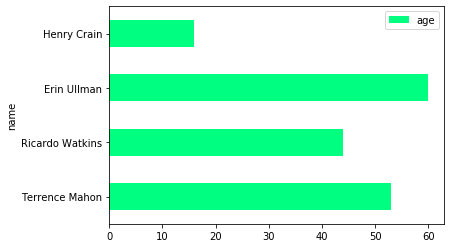

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

# Check the column names of names_df
print("The column names of names_df are", names_df.columns)

# Convert to Pandas DataFrame  
df_pandas = names_df.toPandas()

# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='name', y='age', colormap='winter_r')
plt.show()

## Part 1: Create a DataFrame from CSV file
Every 4 years, the soccer fans throughout the world celebrates a festival called “Fifa World Cup” and with that, everything seems to change in many countries. In this 3 part exercise, you'll be doing some exploratory data analysis (EDA) on the "FIFA 2018 World Cup Player" dataset using PySpark SQL which involve DataFrame operations, SQL queries and visualization.

In the first part, you'll load FIFA 2018 World Cup Players dataset (Fifa2018_dataset.csv) which is in CSV format into a PySpark's dataFrame and inspect the data using basic DataFrame operations.

In [11]:
# Path to data
file_path = ".../data/datacamp/fifa"

# Create an DataFrame from file_path
fifa_df = spark.read.parquet(file_path)

# Check the schema of columns
fifa_df.printSchema()

# Show the first 10 observations
fifa_df.show(10)

# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

root
 |-- _c0: long (nullable = true)
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)
 |-- photo: string (nullable = true)
 |-- nationality: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- overall: long (nullable = true)
 |-- potential: long (nullable = true)
 |-- club: string (nullable = true)
 |-- clublogo: string (nullable = true)
 |-- value: string (nullable = true)
 |-- wage: string (nullable = true)
 |-- special: long (nullable = true)
 |-- acceleration: string (nullable = true)
 |-- aggression: string (nullable = true)
 |-- agility: string (nullable = true)
 |-- balance: string (nullable = true)
 |-- ballcontrol: string (nullable = true)
 |-- composure: string (nullable = true)
 |-- crossing: string (nullable = true)
 |-- curve: string (nullable = true)
 |-- dribbling: string (nullable = true)
 |-- finishing: string (nullable = true)
 |-- freekickaccuracy: string (nullable = true)
 |-- gkdiving: string (nullable = true)
 |-- gkhandling: str

There are 17981 rows in the fifa_df DataFrame


## Part 2: SQL Queries on DataFrame
The fifa_df DataFrame that we created has additional information about datatypes and names of columns associated with it. This additional information allows PySpark SQL to run SQL queries on DataFrame. SQL queries are concise and easy to run compared to DataFrame operations. But in order to apply SQL queries on DataFrame first, you need to create a temporary view of DataFrame as a table and then apply SQL queries on the created table (Running SQL Queries Programmatically).

In the second part, you'll create a temporary table of fifa_df DataFrame and run SQL queries to extract the 'Age' column of players from Germany.

In [12]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')

# Construct the "query"
query = '''SELECT Age FROM fifa_df_table WHERE Nationality == "Germany"'''

# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)

# Generate basic statistics
fifa_df_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293742|
|    min|               16|
|    max|               36|
+-------+-----------------+



## Part 3: Data visualization
Data visualization is important for exploratory data analysis (EDA). PySpark DataFrame is a perfect for data visualization compared to RDDs because of its inherent structure and schema.

In this third part, you'll create a histogram of the ages of all the players from Germany from the DataFrame that you created in the previous exercise. For this, you'll first convert the PySpark DataFrame into Pandas DataFrame and use matplotlib's plot() function to create a density plot of ages of all players from Germany.

In [13]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} scipy

Solving environment: done

# All requested packages already installed.



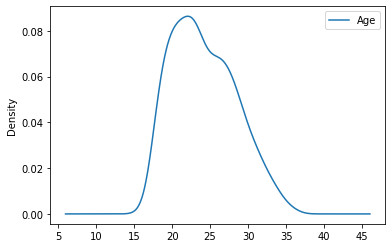

In [14]:
# Convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()

# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas.plot(kind='density')
plt.show()